# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
from citipy import citipy
import os
import matplotlib.pyplot as plt
import scipy.stats as stat
from scipy.stats import linregress
import pandas as pd
import numpy as np
import requests

from Homework_06_Python_APIs_Instructions_starter_code_api_keys import weather_api_key

weatherpy_folder = "weatherpy"
if not os.path.exists(weatherpy_folder):
    os.mkdir(weatherpy_folder)

## Generate Cities List

In [2]:
cities = []

latitudes = np.random.uniform(low=-90.000, high=90.000, size=2000)
longitudes = np.random.uniform(low=-180.000, high=180.000, size=2000)

for lat_lng in zip(latitudes, longitudes):
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    if city not in cities:
        cities.append(city)

print(len(cities))

755


### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [3]:
base_url = f"http://api.openweathermap.org/data/2.5/weather?appid={weather_api_key}&units=imperial&q="

csv_data = []
for city in cities:
    url = base_url + city
    try:
        response = requests.get(url)
        response.raise_for_status()
        data = response.json()
        
        print(f'Processing Record: City {data["name"]} [{data["id"]}]')
        
        temp = [
            data['name'],
            data['coord']['lat'],
            data['coord']['lon'],
            data['main']['temp_max'],
            data['main']['humidity'],
            data['clouds']['all'],
            data['wind']['speed'],
            data['sys']['country'],
            data['dt']
        ]
        csv_data.append(temp)
    except Exception as e:
        continue

Processing Record: City Lebu [3883457]
Processing Record: City Tamale [2294877]
Processing Record: City Norman Wells [6089245]
Processing Record: City Henties Bay [3356832]
Processing Record: City Jutaí [3663693]
Processing Record: City Clarence Town [2171465]
Processing Record: City Erzin [296852]
Processing Record: City Busselton [2075265]
Processing Record: City Barrow [5880054]
Processing Record: City Yellowknife [6185377]
Processing Record: City Puerto Ayora [3652764]
Processing Record: City Dilla [338998]
Processing Record: City Castro [3466704]
Processing Record: City Mataura [6201424]
Processing Record: City Albany [5106841]
Processing Record: City Olutanga [1697155]
Processing Record: City Sola [2134814]
Processing Record: City Guasdualito [3804949]
Processing Record: City Inagi [1850144]
Processing Record: City Prince Rupert [6113406]
Processing Record: City Tuktoyaktuk [6170031]
Processing Record: City San Cristobal [3628473]
Processing Record: City Niwāri [1261262]
Processi

Processing Record: City Yumbel [3867625]
Processing Record: City Luanda [2240449]
Processing Record: City Basco [1726449]
Processing Record: City Beloha [1067565]
Processing Record: City Mareeba [2158767]
Processing Record: City Bredasdorp [1015776]
Processing Record: City Marsh Harbour [3571913]
Processing Record: City San Fernando del Valle de Catamarca [3837702]
Processing Record: City Viedma [3832899]
Processing Record: City Vincennes [6613142]
Processing Record: City Waingapu [1622318]
Processing Record: City Harper [2276492]
Processing Record: City Los Llanos de Aridane [2514651]
Processing Record: City Arzgir [580716]
Processing Record: City Zhigansk [2012530]
Processing Record: City Aksarka [1512019]
Processing Record: City Jalu [86049]
Processing Record: City Ilulissat [3423146]
Processing Record: City Half Moon Bay [5354943]
Processing Record: City Coyhaique [3894426]
Processing Record: City Kavieng [2094342]
Processing Record: City Seymchan [2121373]
Processing Record: City 

Processing Record: City San Policarpo [1688696]
Processing Record: City Saldanha [3361934]
Processing Record: City Saint-François [2980080]
Processing Record: City Sompeta [1255816]
Processing Record: City Ayagoz [1525988]
Processing Record: City Marystown [6067472]
Processing Record: City Kenai [5866063]
Processing Record: City Arrondissement de Saint-Denis [2980915]
Processing Record: City Kumul [1529484]
Processing Record: City Yining [1786538]
Processing Record: City Hasaki [2112802]
Processing Record: City Popova [2017756]
Processing Record: City Virginia Beach [4791259]
Processing Record: City Adrar [2381972]
Processing Record: City Port-Gentil [2396518]
Processing Record: City Ancud [3899695]
Processing Record: City Koygorodok [543396]
Processing Record: City Rupert [5606000]
Processing Record: City Kiunga [2093846]
Processing Record: City Yangi Marg`ilon [1513491]
Processing Record: City Port Hawkesbury [6111867]
Processing Record: City Russell [4047434]
Processing Record: City

Processing Record: City Orneta [763066]
Processing Record: City Hervey Bay [2146219]
Processing Record: City Bismarck [5688025]
Processing Record: City Chu [1519030]
Processing Record: City Manjacaze [1040938]
Processing Record: City Kangaatsiaq [3422683]
Processing Record: City Traverse City [5012495]
Processing Record: City Udachny [2014624]
Processing Record: City Zhob [1162105]
Processing Record: City Sarangani [1687186]
Processing Record: City Sonāri [1255788]
Processing Record: City Ambilobe [1082243]
Processing Record: City Heihe [2036973]
Processing Record: City Bosaso [64013]
Processing Record: City Qui Nhon [1568574]
Processing Record: City Cap Malheureux [934649]
Processing Record: City Tondano [1623424]
Processing Record: City Sur [286245]
Processing Record: City Atbasar [1526038]
Processing Record: City Kapit [1737185]
Processing Record: City Mpanda [153176]
Processing Record: City Porbandar [1259395]
Processing Record: City Nacala [1035025]
Processing Record: City Normand

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [5]:
csv_filename = os.path.join(weatherpy_folder, 'output.csv')
csv_header = ['City', 'Lat', 'Lng', 'Max Temp', 'Humidity', 'Cloudiness', 'Wind Speed', 'Country', 'Date']

df = pd.DataFrame(csv_data, columns = csv_header)  
df.to_csv(csv_filename, index=False, header=True)
df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Lebu,-37.6167,-73.6500,62.60,71,0,15.32,CL,1612115806
1,Tamale,9.4008,-0.8393,92.64,11,36,4.07,GH,1612115806
2,Norman Wells,65.2820,-126.8329,-20.20,76,90,3.44,CA,1612115806
3,Henties Bay,-22.1160,14.2845,66.99,82,83,10.11,NA,1612115806
4,Jutaí,-5.1833,-68.9000,83.19,83,89,2.01,BR,1612115806


## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [6]:
humidity_100 = df.loc[df['Humidity'] >= 100]
humidity_100.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
5,Clarence Town,-32.5833,151.7833,71.60,100,90,8.05,AU,1612115807
23,Airai,-8.9266,125.4092,61.30,100,100,3.40,TL,1612115810
82,Porgera,-5.4667,143.2000,46.15,100,100,1.41,PG,1612115825
141,Bonavista,48.6499,-53.1147,32.00,100,100,6.91,CA,1612115839
160,Torbay,47.6666,-52.7314,33.01,100,90,17.27,CA,1612115843


In [7]:
#  Get the indices of cities that have humidity over 100%.
humidity_100_indicies = df.index[df['Humidity'] >= 100]
humidity_100_indicies 

Int64Index([  5,  23,  82, 141, 160, 175, 178, 188, 198, 222, 303, 310, 377,
            385, 533, 538, 544, 546, 568, 583, 614],
           dtype='int64')

In [8]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".
clean_city_data = df.drop(humidity_100_indicies, inplace = False ) 
clean_city_data = clean_city_data.reset_index(drop=True)
clean_city_data.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Lebu,-37.6167,-73.6500,62.60,71,0,15.32,CL,1612115806
1,Tamale,9.4008,-0.8393,92.64,11,36,4.07,GH,1612115806
2,Norman Wells,65.2820,-126.8329,-20.20,76,90,3.44,CA,1612115806
3,Henties Bay,-22.1160,14.2845,66.99,82,83,10.11,NA,1612115806
4,Jutaí,-5.1833,-68.9000,83.19,83,89,2.01,BR,1612115806


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

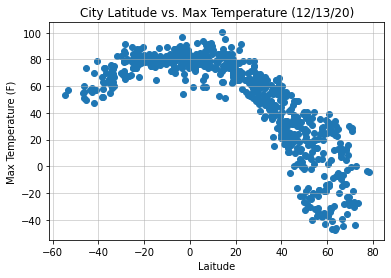

In [9]:
plt.scatter(clean_city_data["Lat"], clean_city_data["Max Temp"])
plt.title("City Latitude vs. Max Temperature (12/13/20)")
plt.xlabel("Laitude")
plt.ylabel("Max Temperature (F)")
plt.grid(linestyle='-', linewidth=1, alpha = 0.5)

latitude_temperature_plot  = os.path.join(weatherpy_folder, "latitude_max_temperature_plot.png")
plt.savefig(latitude_temperature_plot)

In [10]:
# This plot is a relationship bewteen city latitude and max temperature
# The hot temperatures are concentrated around the tropic of cancer, tropic of capricorn and equator

## Latitude vs. Humidity Plot

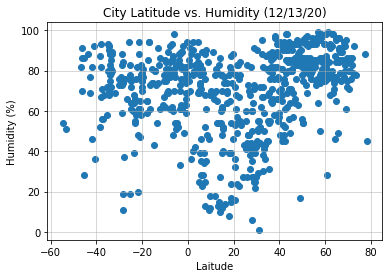

In [11]:
plt.scatter(clean_city_data["Lat"], clean_city_data["Humidity"])
plt.title("City Latitude vs. Humidity (12/13/20)")
plt.xlabel("Laitude")
plt.ylabel("Humidity (%)")
plt.grid(linestyle='-', linewidth=1, alpha = 0.5)

latitude_humidity_plot  = os.path.join(weatherpy_folder, "latitude_humidity_plot.png")
plt.savefig(latitude_humidity_plot)

In [12]:
# This plot is a relationship bewteen citiy latitude and humidity
# There is no strong correlation of humidity to latitude

## Latitude vs. Cloudiness Plot

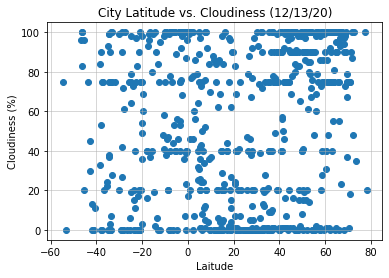

In [13]:
plt.scatter(clean_city_data["Lat"], clean_city_data["Cloudiness"])
plt.title("City Latitude vs. Cloudiness (12/13/20)")
plt.xlabel("Laitude")
plt.ylabel("Cloudiness (%)")
plt.grid(linestyle='-', linewidth=1, alpha = 0.5)

latitude_cloudiness_plot  = os.path.join(weatherpy_folder, "latitude_cloudiness_plot.png")
plt.savefig(latitude_cloudiness_plot)

In [14]:
# This plot is a relationship bewteen citiy latitude and cloudiness
# There is no correlation of cloudiness to latitude

## Latitude vs. Wind Speed Plot

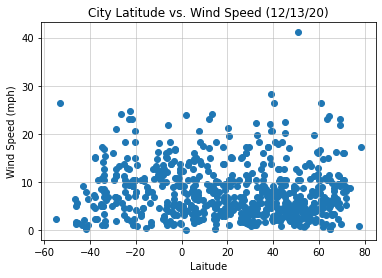

In [15]:
plt.scatter(clean_city_data["Lat"], clean_city_data["Wind Speed"])
plt.title("City Latitude vs. Wind Speed (12/13/20)")
plt.xlabel("Laitude")
plt.ylabel("Wind Speed (mph)")
plt.grid(linestyle='-', linewidth=1, alpha = 0.5)

latitude_windspeed_plot  = os.path.join(weatherpy_folder, "latitude_windspeed_plot.png")
plt.savefig(latitude_windspeed_plot)

In [16]:
# This plot is a relationship bewteen citiy latitude and wind speeds
# The Wind Speeds are greater further away from the equator. Most of the wind speeds lies between 5 mph to 15 mph

## Linear Regression

In [17]:
north_hemisphere = clean_city_data[clean_city_data['Lat'] >= 0]
north_hemisphere = north_hemisphere.reset_index(drop=True)

south_hemisphere = clean_city_data[clean_city_data['Lat'] < 0]
south_hemisphere = south_hemisphere.reset_index(drop=True)

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared is :  -0.87


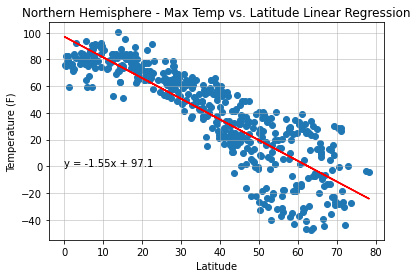

In [18]:
x_values = north_hemisphere["Lat"]
y_values = north_hemisphere["Max Temp"]

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
correlation = stat.pearsonr(x_values, y_values)

plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(0,0))

plt.title('Northern Hemisphere - Max Temp vs. Latitude Linear Regression')
plt.xlabel('Latitude')
plt.ylabel('Temperature (F)')
plt.grid(linestyle='-', linewidth=1, alpha = 0.5)

print("The r-squared is : ", round(correlation[0],2))
plot_filename = os.path.join(weatherpy_folder, "latitude_max_temp_linear_regression_north_hemisphere_plot.png")
plt.savefig(plot_filename)

In [19]:
# This scatterplot with linear regression has r-squared value of -0.86
# There is a strong negative linear relationship between 
# decreasing latitude and decreasing temperature in the Northern Hemisphere. 

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared is :  0.65


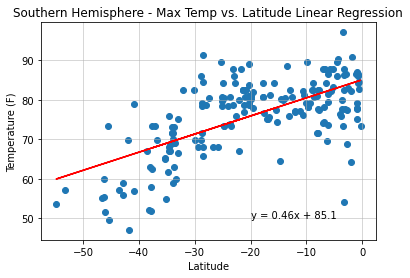

In [20]:
x_values = south_hemisphere["Lat"]
y_values = south_hemisphere["Max Temp"]

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
correlation = stat.pearsonr(x_values, y_values)

plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-20,50))

plt.title('Southern Hemisphere - Max Temp vs. Latitude Linear Regression')
plt.xlabel('Latitude')
plt.ylabel('Temperature (F)')
plt.grid(linestyle='-', linewidth=1, alpha = 0.5)

print("The r-squared is : ", round(correlation[0],2))
plot_filename = os.path.join(weatherpy_folder, "latitude_max_temp_linear_regression_south_hemisphere_plot.png")
plt.savefig(plot_filename)

In [21]:
# This scatterplot with linear regression has r-squared value of 0.53
# There is a weak postive linear relationship between 
# increasing latitude and increasing temperature in the Southern Hemisphere.

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared is :  0.44


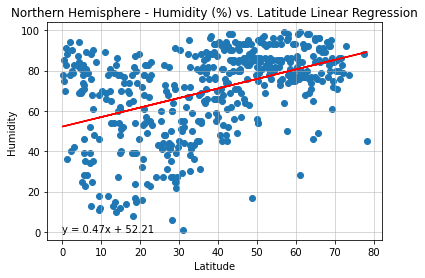

In [22]:
x_values = north_hemisphere["Lat"]
y_values = north_hemisphere["Humidity"]

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
correlation = stat.pearsonr(x_values, y_values)

plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(0,0))

plt.title('Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression')
plt.xlabel('Latitude')
plt.ylabel('Humidity')
plt.grid(linestyle='-', linewidth=1, alpha = 0.5)

print("The r-squared is : ", round(correlation[0],2))
plot_filename = os.path.join(weatherpy_folder, "latitude_humidity_linear_regression_north_hemisphere_plot.png")
plt.savefig(plot_filename)

In [23]:
# This scatterplot with linear regression has r-squared value of 0.37
# There is a very weak relationship between latitude and humidity in the Northern Hemisphere

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared is :  0.05


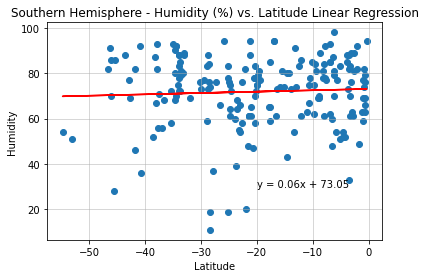

In [24]:
x_values = south_hemisphere["Lat"]
y_values = south_hemisphere["Humidity"]

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
correlation = stat.pearsonr(x_values, y_values)

plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-20,30))

plt.title('Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression')
plt.xlabel('Latitude')
plt.ylabel('Humidity')
plt.grid(linestyle='-', linewidth=1, alpha = 0.5)

print("The r-squared is : ", round(correlation[0],2))
plot_filename = os.path.join(weatherpy_folder, "latitude_humidity_linear_regression_south_hemisphere_plot.png")
plt.savefig(plot_filename)

In [25]:
# This scatterplot with linear regression has r-squared value of 0.25
# There is a very weak relationship between latitude and humidity in the Southern Hemisphere

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared is :  0.33


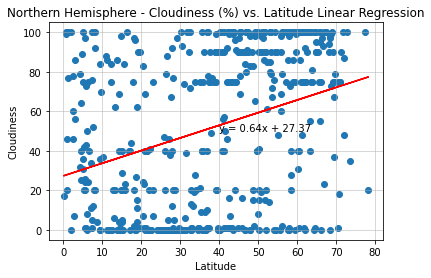

In [26]:
x_values = north_hemisphere["Lat"]
y_values = north_hemisphere["Cloudiness"]

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
correlation = stat.pearsonr(x_values, y_values)

plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(40,50))

plt.title('Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression')
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')
plt.grid(linestyle='-', linewidth=1, alpha = 0.5)

print("The r-squared is : ", round(correlation[0],2))
plot_filename = os.path.join(weatherpy_folder, "latitude_cloudiness_linear_regression_north_hemisphere_plot.png")
plt.savefig(plot_filename)

In [27]:
# This scatterplot with linear regression has r-squared value of 0.32
# There is no correlation between the latitude and cloudiness in the Northern Hemisphere.

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared is :  0.22


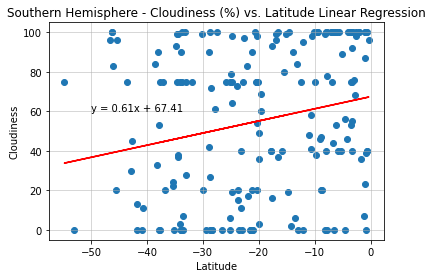

In [28]:
x_values = south_hemisphere["Lat"]
y_values = south_hemisphere["Cloudiness"]

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
correlation = stat.pearsonr(x_values, y_values)

plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-50,60))

plt.title('Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression')
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')
plt.grid(linestyle='-', linewidth=1, alpha = 0.5)

print("The r-squared is : ", round(correlation[0],2))
plot_filename = os.path.join(weatherpy_folder, "latitude_cloudiness_linear_regression_south_hemisphere_plot.png")
plt.savefig(plot_filename)

In [29]:
# This scatterplot with linear regression has r-squared value of 0.29
# There is no correlation between the latitude and cloudiness in the Southern Hemisphere.

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared is :  -0.03


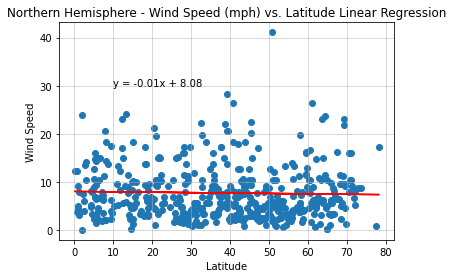

In [30]:
x_values = north_hemisphere["Lat"]
y_values = north_hemisphere["Wind Speed"]

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
correlation = stat.pearsonr(x_values, y_values)

plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(10,30))

plt.title('Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression')
plt.xlabel('Latitude')
plt.ylabel('Wind Speed')
plt.grid(linestyle='-', linewidth=1, alpha = 0.5)

print("The r-squared is : ", round(correlation[0],2))
plot_filename = os.path.join(weatherpy_folder, "latitude_wind_speed_linear_regression_north_hemisphere_plot.png")
plt.savefig(plot_filename)

In [31]:
# This scatterplot with linear regression has r-squared value of 0.23
# There is no correlation between the latitude and wind speed in the Northern Hemisphere.

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared is :  0.07


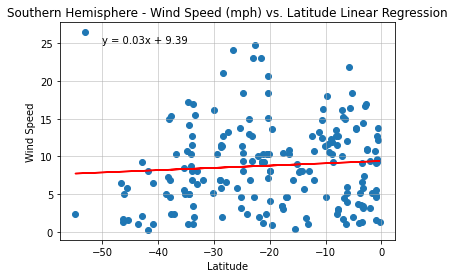

In [32]:
x_values = south_hemisphere["Lat"]
y_values = south_hemisphere["Wind Speed"]

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
correlation = stat.pearsonr(x_values, y_values)

plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-50,25))

plt.title('Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression')
plt.xlabel('Latitude')
plt.ylabel('Wind Speed')
plt.grid(linestyle='-', linewidth=1, alpha = 0.5)

print("The r-squared is : ", round(correlation[0],2))
plot_filename = os.path.join(weatherpy_folder, "latitude_wind_speed_linear_regression_south_hemisphere_plot.png")
plt.savefig(plot_filename)

In [33]:
# This scatterplot with linear regression has r-squared value of -0.29
# There is a stronger correlation between latitude and wind speed in the Southern Hemisphere.